In [87]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [88]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler 

# **Import data**

In [89]:
# Import data from github
url = 'https://raw.githubusercontent.com/BrianNguyen2001/Predict-Etherium-price-by-Machine-Learning/main/pred_eth_data.csv'
data = pd.read_csv(url, index_col=0, parse_dates=True)
data.index = data.index.astype('datetime64[ns]')
data

,polarity,subjectivity,Negative,Positive,return_etherium,return_bitcoin,return_litecoin,avg_diff,act_address,avg_gas,trans_count,block_count,block_size
Time,,,,,,,,,,,,,
2017-11-10,0.000000,0.000000,0.0,0.0,-0.067411,-0.073554,-0.077946,1.430000e+15,233966.0,0.191088,457427.0,6300.0,84500680.0
2017-11-11,0.050000,0.272917,0.0,1.0,0.051555,-0.039368,0.051353,1.440000e+15,194696.0,0.186744,394378.0,6267.0,79370301.0
2017-11-12,0.000000,0.000000,0.0,0.0,-0.021523,-0.064101,-0.052933,1.490000e+15,213315.0,0.210592,434380.0,6245.0,82639583.0
2017-11-13,0.116667,0.308333,0.0,1.0,0.028606,0.102422,0.040523,1.460000e+15,214384.0,0.220279,443176.0,6225.0,89907928.0
2017-11-14,0.000000,0.000000,0.0,0.0,0.066037,0.011626,0.020899,1.450000e+15,226170.0,0.235910,475984.0,6122.0,99374433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,0.200000,0.162500,0.0,1.0,-0.017259,-0.003144,-0.028561,1.440000e+16,508395.0,6.325360,1094639.0,6165.0,633978416.0
2022-05-26,0.163997,0.277742,0.0,1.0,-0.072456,-0.009984,-0.065653,1.420000e+16,474790.0,8.062978,1071180.0,6092.0,687245210.0
2022-05-27,-0.051562,0.317188,1.0,0.0,-0.043788,-0.021856,-0.035474,1.460000e+16,494940.0,6.816255,1093469.0,6218.0,618243706.0


In [90]:
# Check NaN values ​​in dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1654 entries, 2017-11-10 to 2022-05-29
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   polarity         1654 non-null   float64
 1   subjectivity     1654 non-null   float64
 2   Negative         1654 non-null   float64
 3   Positive         1654 non-null   float64
 4   return_etherium  1654 non-null   float64
 5   return_bitcoin   1654 non-null   float64
 6   return_litecoin  1654 non-null   float64
 7   avg_diff         1654 non-null   float64
 8   act_address      1654 non-null   float64
 9   avg_gas          1654 non-null   float64
 10  trans_count      1654 non-null   float64
 11  block_count      1654 non-null   float64
 12  block_size       1654 non-null   float64
dtypes: float64(13)
memory usage: 180.9 KB


In [91]:
data.Negative, data.Positive = data.Negative.astype('object'), data.Positive.astype('object')
data[['Negative','Positive']].describe()

,Negative,Positive
count,1654.0,1654.0
unique,2.0,2.0
top,0.0,1.0
freq,1335.0,1180.0


In [92]:
data.describe()

,polarity,subjectivity,return_etherium,return_bitcoin,return_litecoin,avg_diff,act_address,avg_gas,trans_count,block_count,block_size
count,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1.654000e+03,1654.000000,1654.000000,1.654000e+03,1654.000000,1.654000e+03
mean,0.060225,0.229316,0.002254,0.001534,0.001490,4.660133e+15,435454.021161,6.952772,9.070663e+05,6224.828900,2.431480e+08
std,0.099130,0.143044,0.051057,0.040767,0.057099,3.551804e+15,147010.239064,12.890340,2.865304e+05,399.193601,1.535289e+08
min,-0.600000,0.000000,-0.423472,-0.371695,-0.361773,1.390000e+15,171484.000000,0.050078,3.811510e+05,4139.000000,7.937030e+07
25%,0.000000,0.125000,-0.021807,-0.016276,-0.026834,2.300000e+15,305877.250000,0.145192,6.460402e+05,6038.250000,1.309455e+08
50%,0.053002,0.216667,0.001399,0.001477,-0.000090,3.130000e+15,404810.500000,0.586776,8.551020e+05,6404.000000,1.648381e+08
75%,0.101667,0.314559,0.027832,0.018983,0.027714,6.200000e+15,562800.500000,8.263823,1.173746e+06,6475.000000,3.037059e+08
max,0.750000,1.000000,0.264581,0.252472,0.475978,1.470000e+16,905234.000000,200.271677,1.716600e+06,6637.000000,7.664025e+08


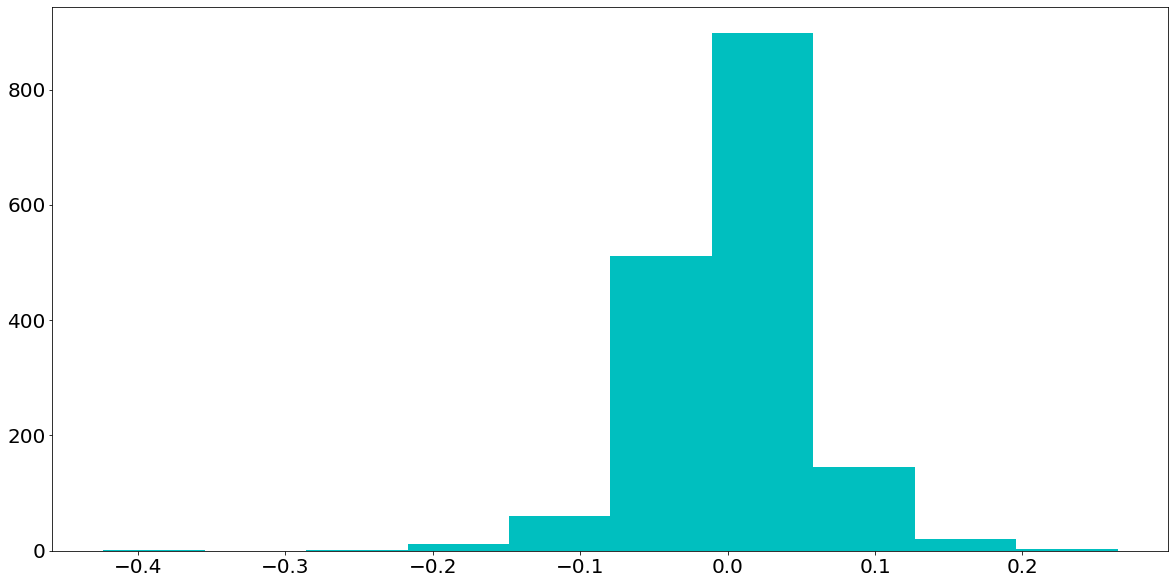

In [93]:
plt.figure(figsize=(20,10))
plt.hist(data.return_etherium, color='c')
plt.show()

# **Model**

In [94]:
df = data.loc['2017-11-10':'2022-01-31']
df.index.set_names('Train sheet',inplace=True)
df

,polarity,subjectivity,Negative,Positive,return_etherium,return_bitcoin,return_litecoin,avg_diff,act_address,avg_gas,trans_count,block_count,block_size
Train sheet,,,,,,,,,,,,,
2017-11-10,0.000000,0.000000,0.0,0.0,-0.067411,-0.073554,-0.077946,1.430000e+15,233966.0,0.191088,457427.0,6300.0,84500680.0
2017-11-11,0.050000,0.272917,0.0,1.0,0.051555,-0.039368,0.051353,1.440000e+15,194696.0,0.186744,394378.0,6267.0,79370301.0
2017-11-12,0.000000,0.000000,0.0,0.0,-0.021523,-0.064101,-0.052933,1.490000e+15,213315.0,0.210592,434380.0,6245.0,82639583.0
2017-11-13,0.116667,0.308333,0.0,1.0,0.028606,0.102422,0.040523,1.460000e+15,214384.0,0.220279,443176.0,6225.0,89907928.0
2017-11-14,0.000000,0.000000,0.0,0.0,0.066037,0.011626,0.020899,1.450000e+15,226170.0,0.235910,475984.0,6122.0,99374433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,0.016667,0.166667,0.0,1.0,-0.018245,0.007764,-0.003064,1.260000e+16,537712.0,32.524507,1133684.0,6494.0,608092921.0
2022-01-28,0.087991,0.257295,0.0,1.0,0.051214,0.017397,0.023180,1.250000e+16,563346.0,30.786798,1137559.0,6472.0,556676429.0
2022-01-29,0.125000,0.300000,0.0,1.0,0.019627,0.009365,0.012711,1.260000e+16,564640.0,26.128559,1147157.0,6461.0,572057411.0


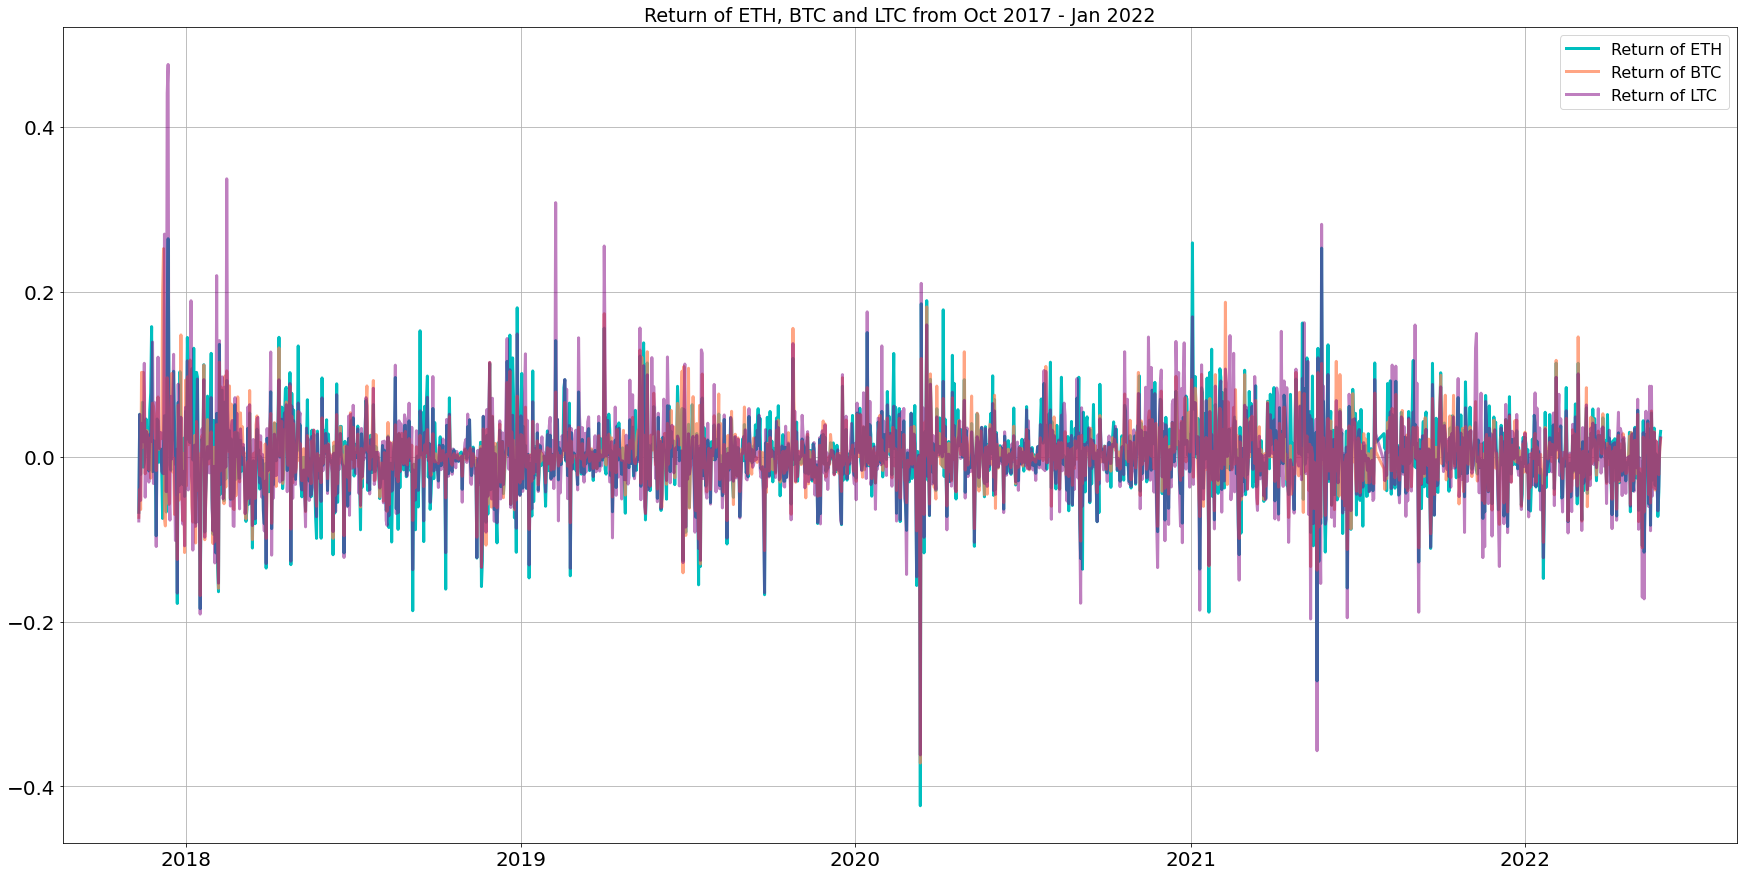

In [95]:
# Visualazition
plt.figure(figsize=(30,15))
plt.plot(data.return_etherium, color='c',linewidth= 3)
plt.plot(data.return_bitcoin, color='coral',linewidth= 3, alpha = 0.7)
plt.plot(data.return_litecoin, color='purple',linewidth= 3, alpha = 0.5)
plt.grid()
plt.legend(['Return of ETH','Return of BTC','Return of LTC'])
plt.title('Return of ETH, BTC and LTC from Oct 2017 - Jan 2022')
plt.show()

In [96]:
# Set the independent variable property
feature = df.columns[df.columns!='return_etherium'].to_list()
target=  [df.columns[4]]

In [97]:
y = df[target]
X = df[feature]

# Split the train and test
n_state = 42
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state=n_state)

# **Building model**

**Randome Forest**

In [98]:
# Build Random forest model
random_forest = RandomForestRegressor(random_state = n_state, n_estimators=500, max_features="auto")
random_forest.fit(X_train, y_train)

# Predict
y_pred_RF = random_forest.predict(X_test)

In [99]:
y_pred_RF = pd.DataFrame(y_pred_RF,index=y_test.index,columns=['random_forest_predict'])
result_RF = pd.concat([y_test,y_pred_RF],axis=1)
result_RF.sort_index(inplace=True)

**Support Vector Regression**

In [100]:
# Call function
sc_X = StandardScaler()
sc_y = StandardScaler()

# Scale train set
X_sc_train = sc_X.fit_transform(X_train)
y_sc_train = sc_y.fit_transform(y_train)

# Scale test set
X_sc_test = sc_X.fit_transform(X_test)
y_sc_test = sc_y.fit_transform(y_test)

In [101]:
# Buil SVR model with linear kernel 
regressor_linear = SVR(kernel = 'linear')
regressor_linear.fit(X_sc_train, y_sc_train)

# Predict
y_sc_pred = regressor_linear.predict(X_sc_test)

In [102]:
# Inverse data
y_sc_pred = y_sc_pred.reshape(-1,1)
y_pred_svr = sc_y.inverse_transform(y_sc_pred)
y_pred_svr = pd.DataFrame(y_pred_svr,columns=['svr_predict'],index=y_test.index)

result_svr = pd.concat([y_test,y_pred_svr],axis=1)
result_svr.sort_index(inplace=True)

# **Đánh giá hiệu suất dự báo của mô hình**

In [103]:
model_results = pd.concat([result_RF,result_svr.svr_predict],axis=1)
model_results

,return_etherium,random_forest_predict,svr_predict
Train sheet,,,
2017-11-25,-0.018182,0.064928,0.096321
2017-12-03,0.005187,0.022053,0.018285
2017-12-09,0.038311,0.062114,0.067140
2017-12-10,-0.067119,0.008433,-0.004908
2017-12-12,0.264581,0.109263,0.234936
...,...,...,...
2022-01-20,-0.030591,-0.026101,-0.030004
2022-01-21,-0.147674,-0.109668,-0.110605
2022-01-25,0.006385,0.002032,-0.001377


**Visualization Random Forest**

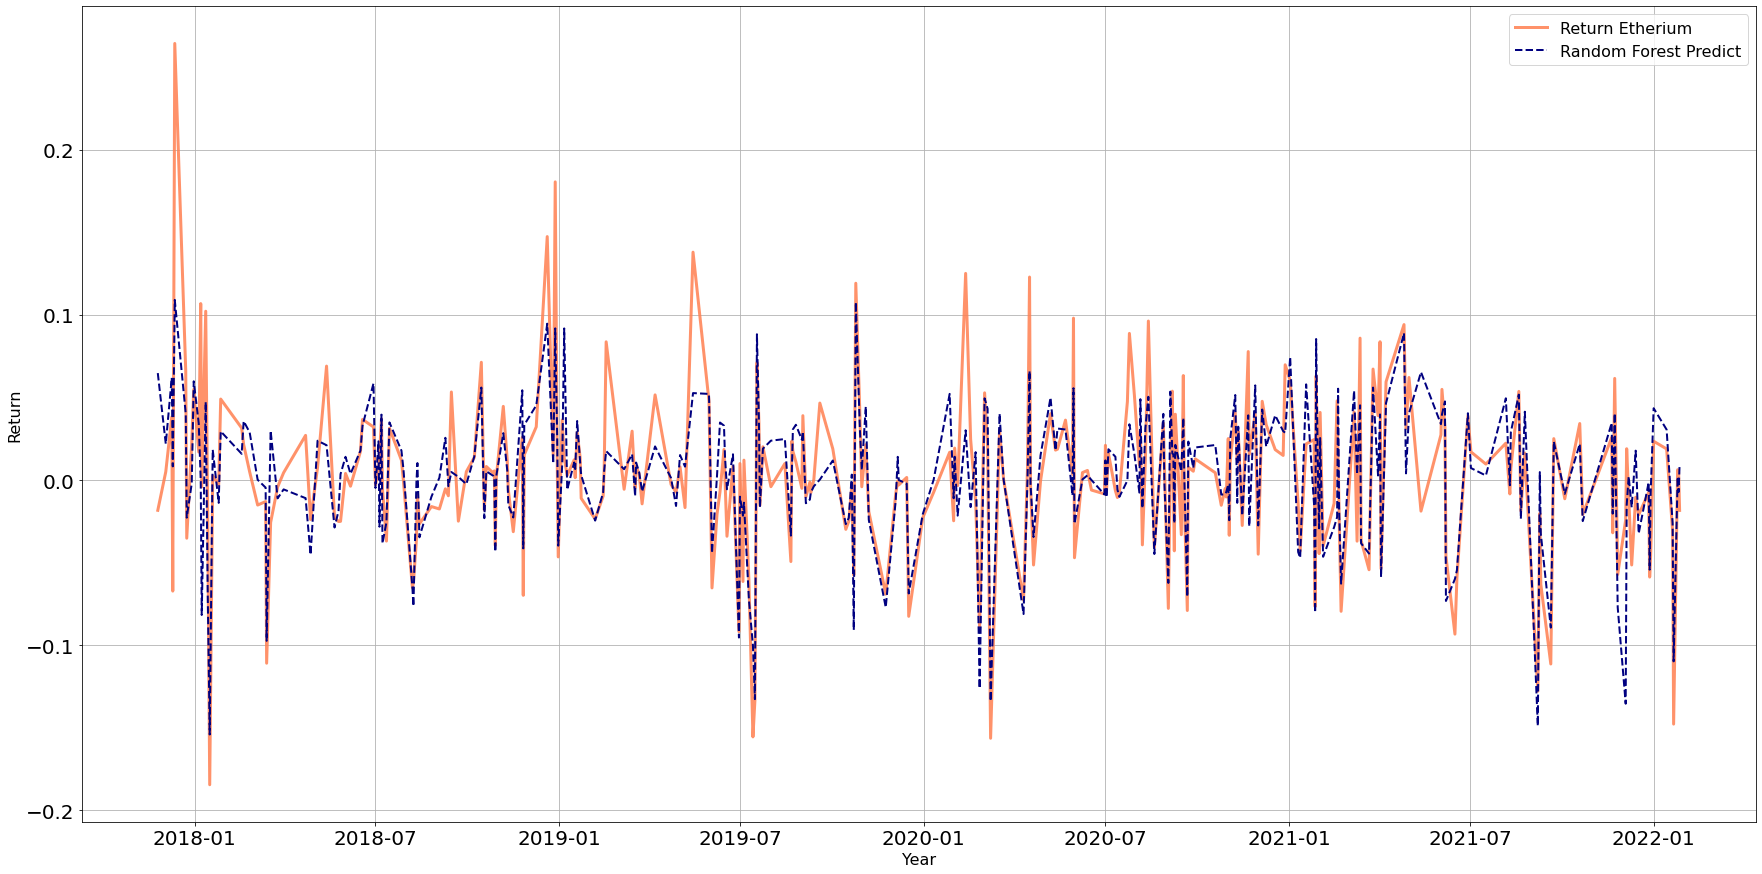

In [104]:
plt.figure(figsize=(30,15))

plt.plot(model_results.return_etherium,c='coral',linewidth = 3,alpha= 0.85)
plt.plot(model_results.random_forest_predict,'--',color = 'navy',linewidth = 2)

plt.legend(['Return Etherium','Random Forest Predict'])

plt.grid()
plt.xlabel('Year')
plt.ylabel('Return')
plt.show()

**Visualization SVR**

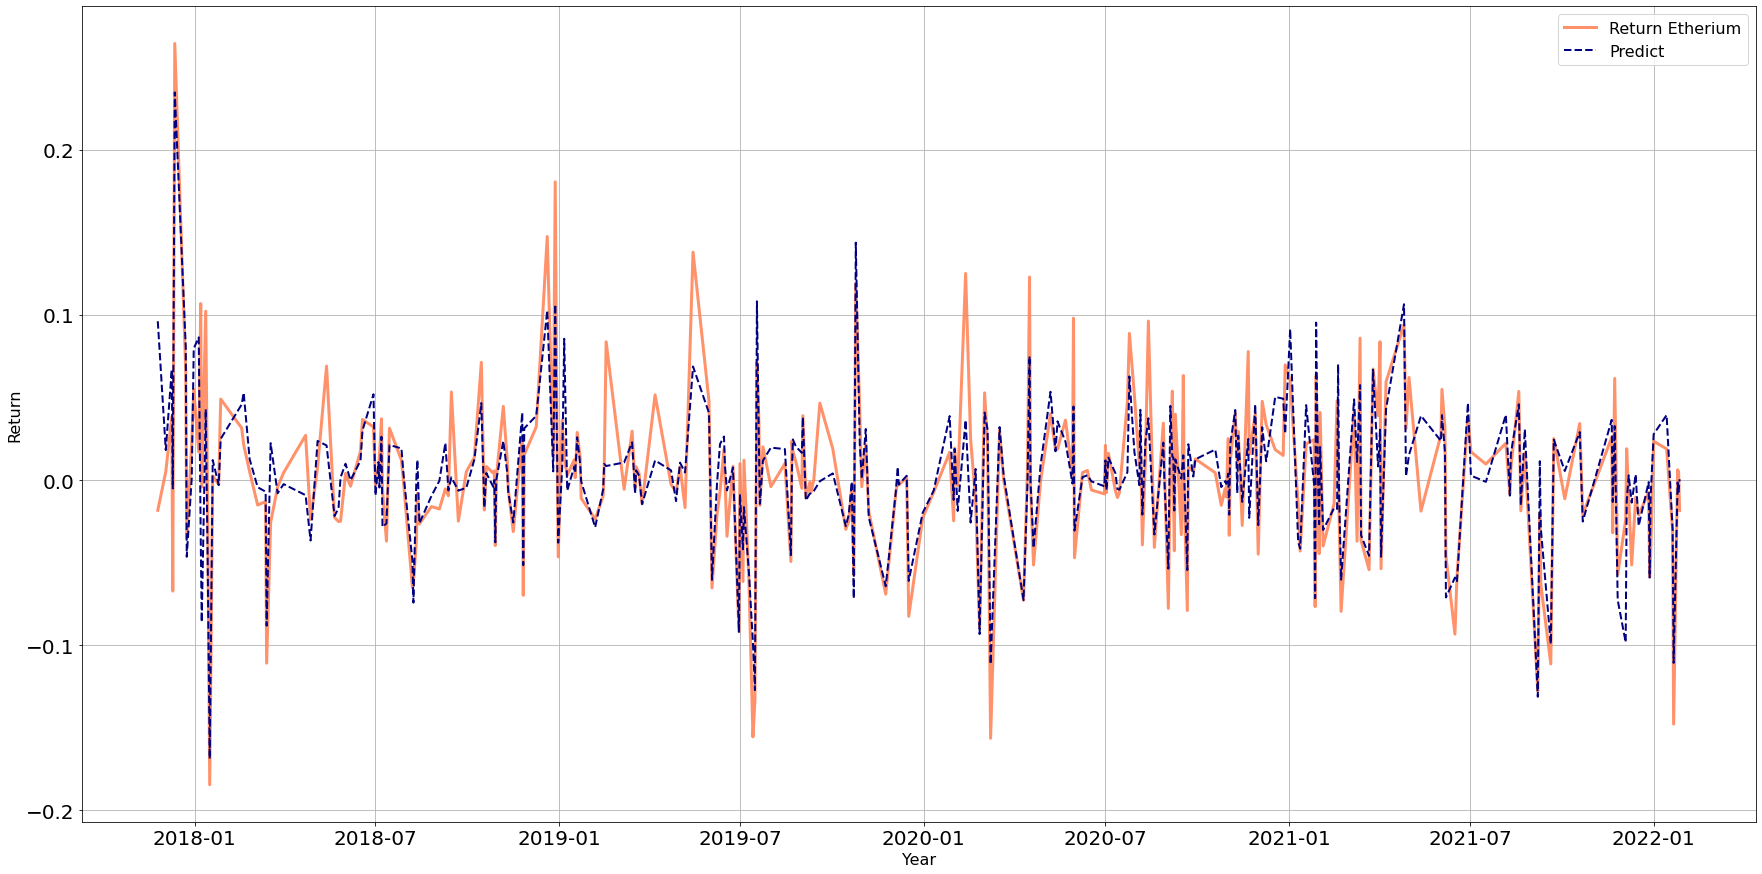

In [105]:
plt.figure(figsize=(30,15))

plt.plot(model_results.return_etherium,c='coral',linewidth = 3,alpha= 0.85)
plt.plot(model_results.svr_predict,'--',color = 'navy',linewidth = 2)

plt.grid()
plt.legend(['Return Etherium','Predict'])

plt.xlabel('Year')
plt.ylabel('Return')
plt.show()

**RMSE & MAPE**

In [106]:
# Random Forest Regression model
rmse = np.sqrt(mean_squared_error(model_results.return_etherium, model_results.random_forest_predict))
mape = (mean_absolute_percentage_error(model_results.return_etherium, model_results.random_forest_predict))

print('Random Forest Regression model:')
print(f'RMSE = {round(rmse,4)}')
print(f'MAPE = {round(mape,2)}%')

Random Forest Regression model:
RMSE = 0.0281
MAPE = 1.46%


In [107]:
# Support Vector Regression model
rmse = np.sqrt(mean_squared_error(model_results.return_etherium, model_results.svr_predict))
mape = (mean_absolute_percentage_error(model_results.return_etherium, model_results.svr_predict))

print('Support Vector Regression model:')
print(f'RMSE = {round(rmse,4)}')
print(f'MAPE = {round(mape,2)}%')

Support Vector Regression model:
RMSE = 0.0264
MAPE = 1.2%


# **PREDICT ON THE NEW DATASET**

**Import new data**

In [108]:
df_new = data.loc['2022-02-01':'2022-05-29']
df_new.index = df_new.index.set_names('Test sheet')
df_new


,polarity,subjectivity,Negative,Positive,return_etherium,return_bitcoin,return_litecoin,avg_diff,act_address,avg_gas,trans_count,block_count,block_size
Test sheet,,,,,,,,,,,,,
2022-02-01,0.145000,0.360000,0.0,1.0,0.038626,0.006760,0.053056,1.280000e+16,596581.0,36.476075,1173199.0,6501.0,585956982.0
2022-02-02,0.053704,0.254630,0.0,1.0,-0.039133,-0.046209,-0.059323,1.290000e+16,582513.0,34.921916,1152665.0,6454.0,600951707.0
2022-02-03,0.057143,0.121429,0.0,1.0,-0.001376,0.005456,0.015945,1.240000e+16,564023.0,28.964509,1111215.0,6423.0,568860088.0
2022-02-04,0.166667,0.233333,0.0,1.0,0.113627,0.116978,0.096394,1.260000e+16,600858.0,27.282447,1168994.0,6556.0,557516048.0
2022-02-05,0.023438,0.205208,0.0,1.0,0.010411,-0.001439,0.008259,1.280000e+16,664335.0,33.298787,1235023.0,6387.0,530563900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,0.200000,0.162500,0.0,1.0,-0.017259,-0.003144,-0.028561,1.440000e+16,508395.0,6.325360,1094639.0,6165.0,633978416.0
2022-05-26,0.163997,0.277742,0.0,1.0,-0.072456,-0.009984,-0.065653,1.420000e+16,474790.0,8.062978,1071180.0,6092.0,687245210.0
2022-05-27,-0.051562,0.317188,1.0,0.0,-0.043788,-0.021856,-0.035474,1.460000e+16,494940.0,6.816255,1093469.0,6218.0,618243706.0


In [109]:
# Thiết lập thuộc tính biến độc lập
feature_new = df_new.columns[df_new.columns!='return_etherium'].to_list()
target_new =  [df_new.columns[4]]

y_new = df_new[target_new]
X_new = df_new[feature_new]

# Split the train and test
n_state = 42
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new,y_new, train_size = 0.8, test_size = 0.2, random_state=n_state)

**Randome Forest**


In [110]:
random_forest.fit(X_new_train, y_new_train)

y_new_pred = random_forest.predict(X_new_test)
y_new_pred = pd.DataFrame(y_new_pred,index=y_new_test.index,columns=['random_forest_predict'])

In [111]:
result_RF_new = pd.concat([y_new_test,y_new_pred],axis=1)
result_RF_new.sort_index(inplace=True)
result_RF_new.head(7)

,return_etherium,random_forest_predict
Test sheet,,
2022-02-01,0.038626,0.028278
2022-02-05,0.010411,-0.001656
2022-02-11,-0.048773,-0.051563
2022-02-12,-0.003423,0.002377
2022-02-19,-0.007907,0.000708
2022-02-27,-0.057283,-0.033790
2022-03-04,-0.076668,-0.069958


**Support Vector Regression**

In [112]:
X_new_sc_train = sc_X.fit_transform(X_new_train)
X_new_sc_test = sc_X.fit_transform(X_new_test)

y_new_sc_train = sc_y.fit_transform(y_new_train)
y_new_sc_test = sc_y.fit_transform(y_new_test)

In [113]:
regressor_linear.fit(X_new_sc_train, y_new_sc_train)

y_new_sc_pred = regressor_linear.predict(X_new_sc_test)
y_new_sc_pred = y_new_sc_pred.reshape(-1,1)

# Inverse data
y_new_sc_pred = sc_y.inverse_transform(y_new_sc_pred)
y_new_sc_pred = pd.DataFrame(y_new_sc_pred,columns=['svr_predict'],index=y_new_test.index)

In [114]:
result_svr_new = pd.concat([y_new_test,y_new_sc_pred],axis=1)
result_svr_new.sort_index(inplace=True)
result_svr_new.head(7)

,return_etherium,svr_predict
Test sheet,,
2022-02-01,0.038626,0.028238
2022-02-05,0.010411,0.008549
2022-02-11,-0.048773,-0.027865
2022-02-12,-0.003423,0.005633
2022-02-19,-0.007907,0.010681
2022-02-27,-0.057283,-0.031421
2022-03-04,-0.076668,-0.078538


# **ASSESSMENT OF THE MODEL ON NEW DATA SET**

In [115]:
new_model_result = pd.concat([result_RF_new,result_svr_new.svr_predict],axis=1)
new_model_result.head(7)

,return_etherium,random_forest_predict,svr_predict
Test sheet,,,
2022-02-01,0.038626,0.028278,0.028238
2022-02-05,0.010411,-0.001656,0.008549
2022-02-11,-0.048773,-0.051563,-0.027865
2022-02-12,-0.003423,0.002377,0.005633
2022-02-19,-0.007907,0.000708,0.010681
2022-02-27,-0.057283,-0.033790,-0.031421
2022-03-04,-0.076668,-0.069958,-0.078538


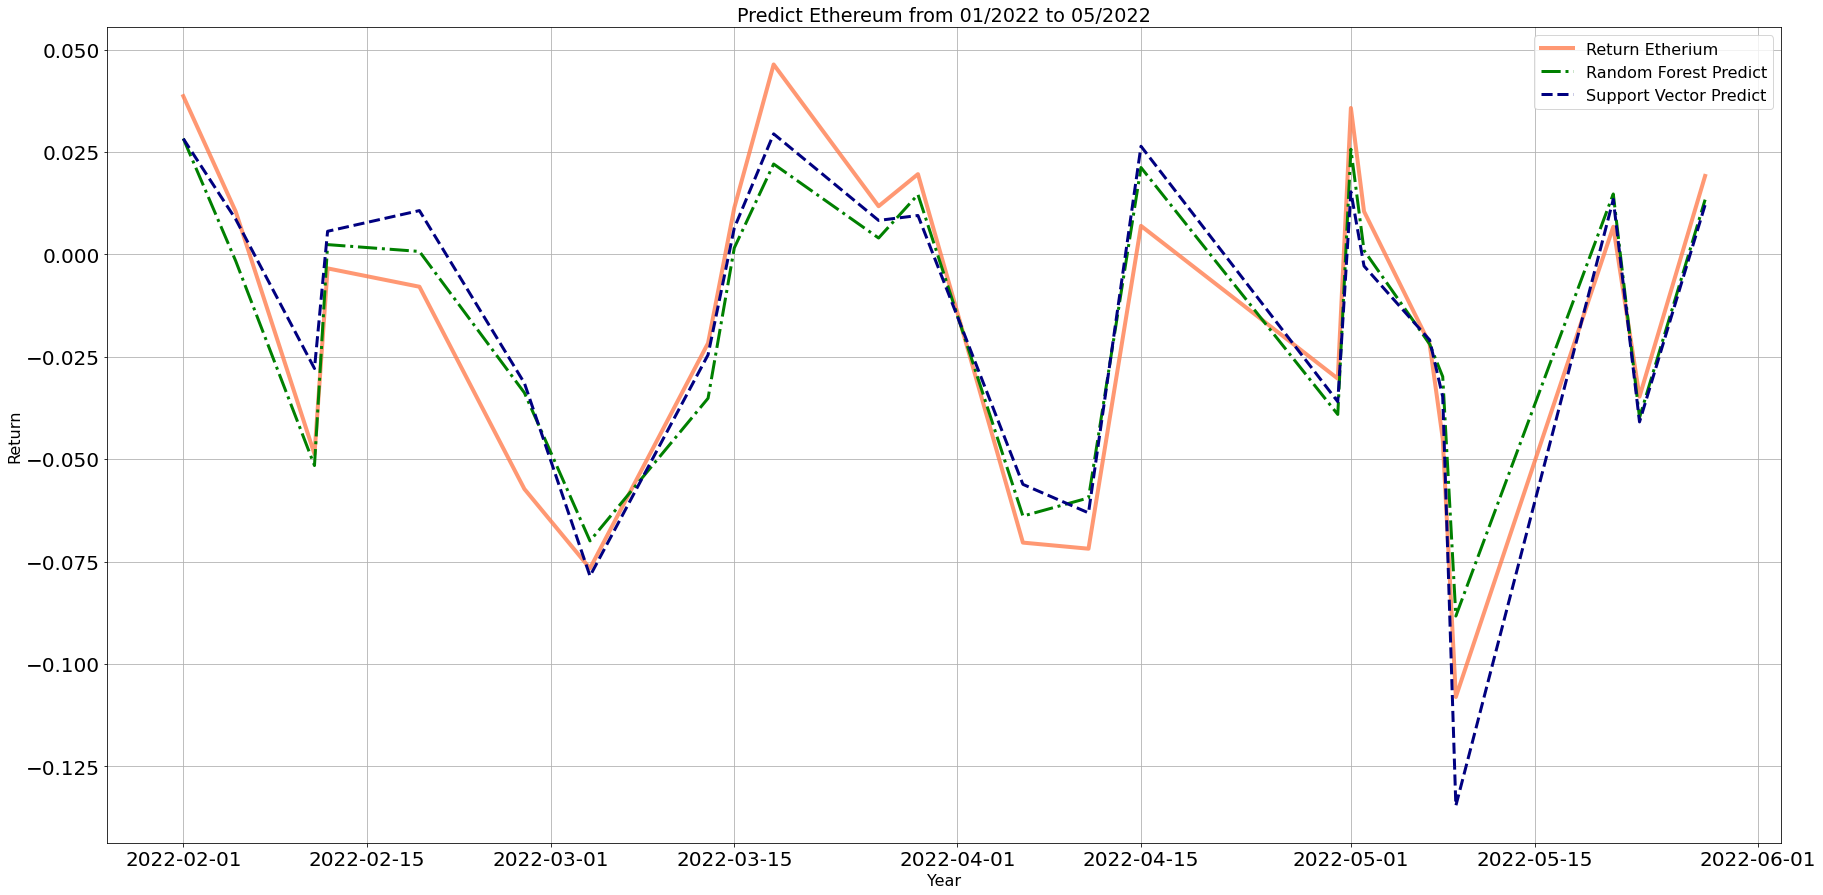

In [116]:
plt.figure(figsize=(30,15))

plt.plot(new_model_result.return_etherium,c='coral',linewidth = 4,alpha= 0.8)
plt.plot(new_model_result.random_forest_predict,'-.',color = 'green',linewidth = 3)
plt.plot(new_model_result.svr_predict,'--',color = 'navy',linewidth = 3)


plt.grid()
plt.legend(['Return Etherium','Random Forest Predict','Support Vector Predict'])

plt.xlabel('Year')
plt.ylabel('Return')

plt.title('Predict Ethereum from 01/2022 to 05/2022')
plt.show()

In [117]:
rmse = np.sqrt(mean_squared_error(new_model_result.return_etherium, new_model_result.random_forest_predict))
mape = (mean_absolute_percentage_error(new_model_result.return_etherium, new_model_result.random_forest_predict))

print('Random Forest:')
print(f'RMSE = {round(rmse,6)}')
print(f'MAPE = {round(mape,4)}%')

Random Forest:
RMSE = 0.011777
MAPE = 0.5683%


In [118]:
rmse = np.sqrt(mean_squared_error(new_model_result.return_etherium, new_model_result.svr_predict))
mape = (mean_absolute_percentage_error(new_model_result.return_etherium, new_model_result.svr_predict))

print('Support Vector Regression:')
print(f'RMSE = {round(rmse,6)}')
print(f'MAPE = {round(mape,4)}%')

Support Vector Regression:
RMSE = 0.013401
MAPE = 0.6372%
